In [ ]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy import stats
import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Loading the dataset
df=pd.read_csv("/content/flight_train.csv")
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [ ]:
#Understanding the data
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          55000 non-null  int64  
 1   FFP_DATE           55000 non-null  object 
 2   FIRST_FLIGHT_DATE  55000 non-null  object 
 3   GENDER             54997 non-null  object 
 4   FFP_TIER           55000 non-null  int64  
 5   WORK_CITY          53034 non-null  object 
 6   WORK_PROVINCE      52216 non-null  object 
 7   WORK_COUNTRY       54980 non-null  object 
 8   AGE                54658 non-null  float64
 9   LOAD_TIME          55000 non-null  object 
 10  FLIGHT_COUNT       55000 non-null  int64  
 11  BP_SUM             55000 non-null  int64  
 12  SUM_YR_1           54738 non-null  float64
 13  SUM_YR_2           54937 non-null  float64
 14  SEG_KM_SUM         55000 non-null  int64  
 15  LAST_FLIGHT_DATE   55000 non-null  object 
 16  LAST_TO_END        550

(55000, 23)

In [ ]:
#Data Cleaning

#1) Convert Date Columns to Datetime

date_columns = ["FFP_DATE", "FIRST_FLIGHT_DATE", "LAST_FLIGHT_DATE", "LOAD_TIME"]
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')
# Display converted date columns
print("\n--- Date Columns After Conversion ---")
print(df[date_columns].head())

#2) Fill missing values in categorical columns with "Unknown"

categorical_cols = ["GENDER", "WORK_CITY", "WORK_PROVINCE", "WORK_COUNTRY"]
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

# Display count of missing values after filling for categorical columns
print("\n--- Missing Values in Categorical Columns After Filling ---")
print(df[categorical_cols].isnull().sum())

# Fill missing values in numerical columns with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Display count of missing values after filling for numerical columns
print("\n--- Missing Values in Numerical Columns After Filling ---")
print(df[num_cols].isnull().sum())

#3)duplicates handling
df.duplicated().sum()
df.drop_duplicates()


--- Date Columns After Conversion ---
    FFP_DATE FIRST_FLIGHT_DATE LAST_FLIGHT_DATE  LOAD_TIME
0 2006-11-02        2008-12-24       2014-03-31 2014-03-31
1 2007-02-19        2007-08-03       2014-03-25 2014-03-31
2 2007-02-01        2007-08-30       2014-03-21 2014-03-31
3 2008-08-22        2008-08-23       2013-12-26 2014-03-31
4 2009-04-10        2009-04-15       2014-03-27 2014-03-31

--- Missing Values in Categorical Columns After Filling ---
GENDER           0
WORK_CITY        0
WORK_PROVINCE    0
WORK_COUNTRY     0
dtype: int64

--- Missing Values in Numerical Columns After Filling ---
MEMBER_NO          0
FFP_TIER           0
AGE                0
FLIGHT_COUNT       0
BP_SUM             0
SUM_YR_1           0
SUM_YR_2           0
SEG_KM_SUM         0
LAST_TO_END        0
AVG_INTERVAL       0
MAX_INTERVAL       0
EXCHANGE_COUNT     0
avg_discount       0
Points_Sum         0
Point_NotFlight    0
dtype: int64


,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,28065,2007-02-19,2007-08-03,Male,6,Unknown,beijing,CN,42.0,2014-03-31,...,167434.0,293678,2014-03-25,7,5.194245,17,29,1.252314,415768,33
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,...,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,33264,2013-01-29,2013-01-29,Male,4,shenzhen,guangdong,CN,32.0,2014-03-31,...,0.0,3453,2013-03-30,368,60.000000,60,0,0.580828,1967,0
54996,3826,2008-11-14,2008-12-12,Male,4,guangzhou,guangdong,CN,56.0,2014-03-31,...,0.0,3820,2013-03-11,387,173.000000,173,0,0.525000,1452,0
54997,10522,2011-04-29,2011-04-29,Male,4,shanghai,shanghai,CN,42.0,2014-03-31,...,0.0,4222,2012-09-09,570,94.000000,94,0,0.475000,2259,1
54998,16872,2010-06-18,2010-06-18,Female,4,benxishi,liaoningsheng,CN,36.0,2014-03-31,...,2163.0,2596,2014-03-10,22,33.000000,82,0,0.772500,2074,0



--- Outlier Analysis ---
Total Outliers Detected: 15179
Outliers present in these features:
FFP_TIER           1489
AGE                 338
FLIGHT_COUNT       1234
BP_SUM              985
SUM_YR_1           1049
SUM_YR_2           1099
SEG_KM_SUM         1107
LAST_TO_END         558
AVG_INTERVAL       1115
MAX_INTERVAL        669
EXCHANGE_COUNT     1421
avg_discount       1330
Points_Sum          996
Point_NotFlight    1789
dtype: int64


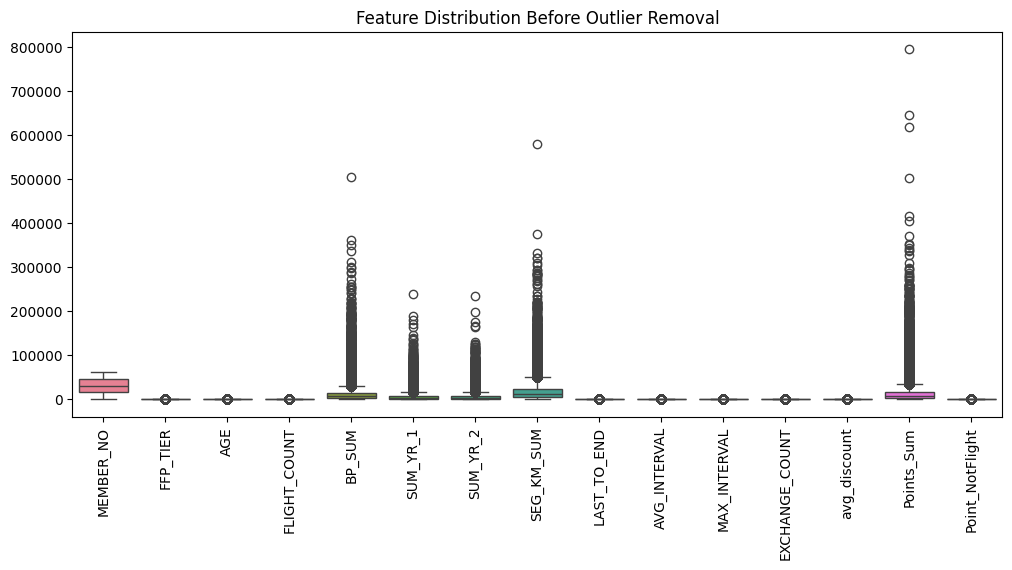

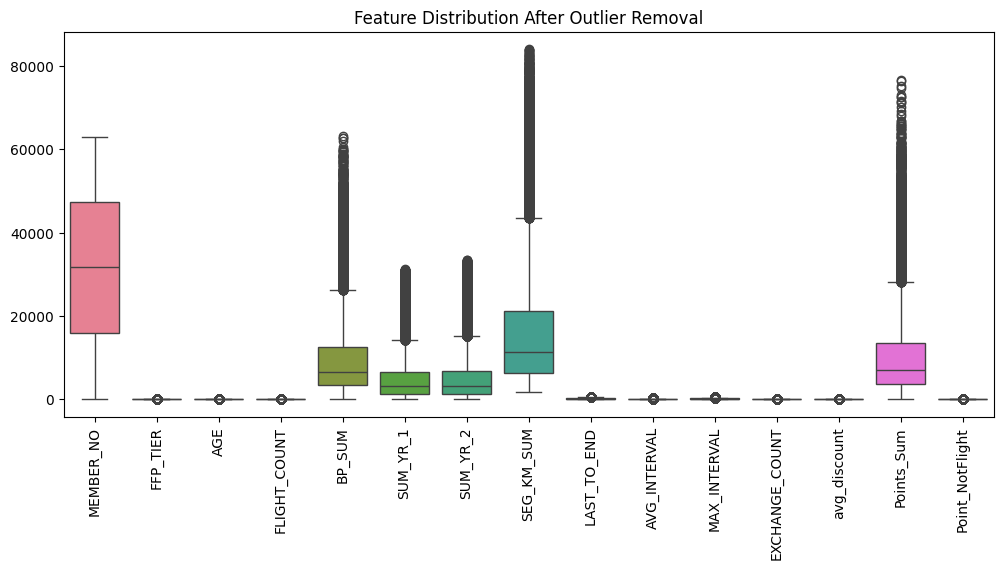

In [ ]:
#Handling Outliers
z_scores = np.abs(stats.zscore(df[num_cols]))

# Count outliers
outlier_counts = (z_scores > 3).sum(axis=0)
total_outliers = (z_scores > 3).sum().sum()

print("\n--- Outlier Analysis ---")
print(f"Total Outliers Detected: {total_outliers}")
print("Outliers present in these features:")
print(outlier_counts[outlier_counts > 0])

# Show data before outlier removal
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[num_cols])
plt.title("Feature Distribution Before Outlier Removal")
plt.xticks(rotation=90)
plt.show()

df = df[(z_scores < 3).all(axis=1)]  # Remove outliers

# Show data after outlier removal
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[num_cols])
plt.title("Feature Distribution After Outlier Removal")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Feauture engineering

#1)Compute customer tenure
df['Customer_Tenure'] = (df['LOAD_TIME'] - df['FFP_DATE']).dt.days / 365
# Display first few rows of Customer_Tenure
print("\n--- Customer Tenure Computed ---")
print(df[['MEMBER_NO', 'FFP_DATE', 'LOAD_TIME', 'Customer_Tenure']].head())

#2)Encode GENDER Column
df["GENDER"] = LabelEncoder().fit_transform(df["GENDER"])
# Display unique values of gender after encoding
print("\n--- GENDER Column After Encoding ---")
print(df["GENDER"].value_counts())

#3)Log Transformation
df["SEG_KM_SUM"] = np.log1p(df["SEG_KM_SUM"])
df["BP_SUM"] = np.log1p(df["BP_SUM"])
df["Points_Sum"] = np.log1p(df["Points_Sum"])
# Display first few transformed values
print("\n--- Log Transformation Applied ---")
print(df[['SEG_KM_SUM', 'BP_SUM', 'Points_Sum']].head())


--- Customer Tenure Computed ---
      MEMBER_NO   FFP_DATE  LOAD_TIME  Customer_Tenure
1028      34723 2010-08-20 2014-03-31         3.613699
1049      12408 2011-10-05 2014-03-31         2.487671
1119      10528 2011-07-26 2014-03-31         2.682192
1127      62623 2007-10-15 2014-03-31         6.463014
1216      31964 2011-02-23 2014-03-31         3.101370

--- GENDER Column After Encoding ---
GENDER
1    35927
0    10870
2        2
Name: count, dtype: int64

--- Log Transformation Applied ---
      SEG_KM_SUM     BP_SUM  Points_Sum
1028   11.277393  10.999597   11.022001
1049   11.169872  11.046053   11.090065
1119   11.331212  10.975568   11.157835
1127   11.299881  10.957730   11.044632
1216   11.252119  10.994488   10.994488


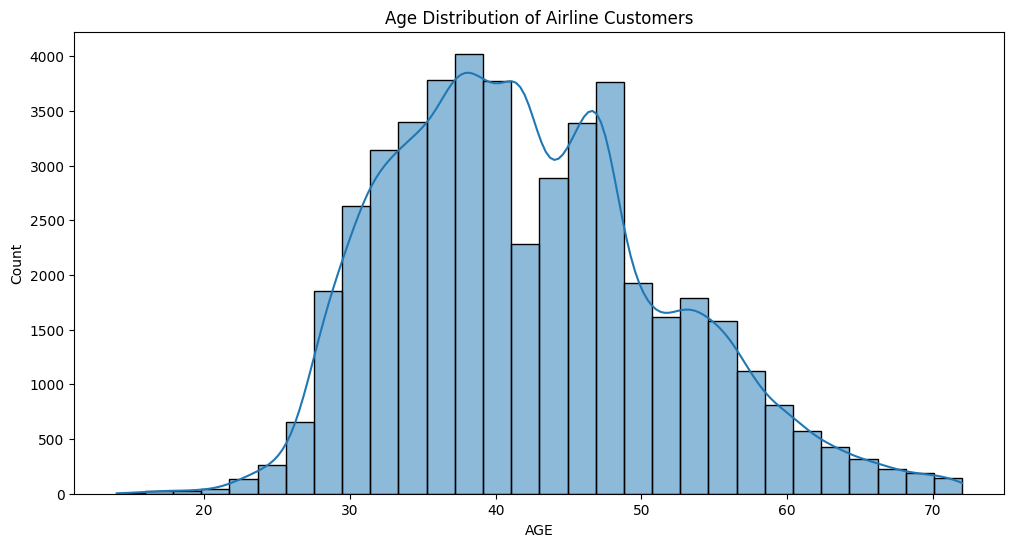

In [ ]:
#Exploratory Data analysis(EDA => 5 Charts)

#1)Histogram
plt.figure(figsize=(12, 6))
sns.histplot(df["AGE"], bins=30, kde=True)
plt.title("Age Distribution of Airline Customers")
plt.show()

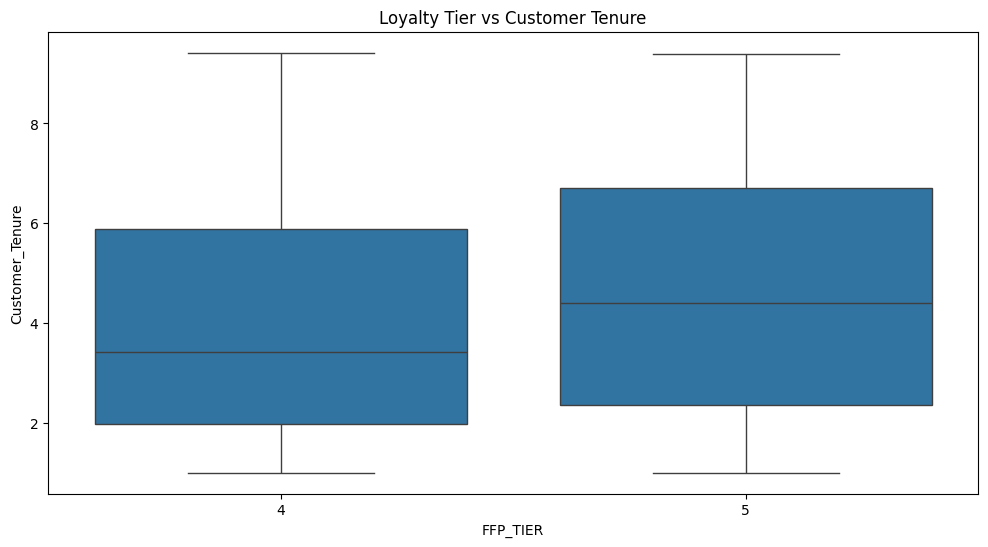

In [ ]:
#2)Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="FFP_TIER", y="Customer_Tenure", data=df)
plt.title("Loyalty Tier vs Customer Tenure")
plt.show()

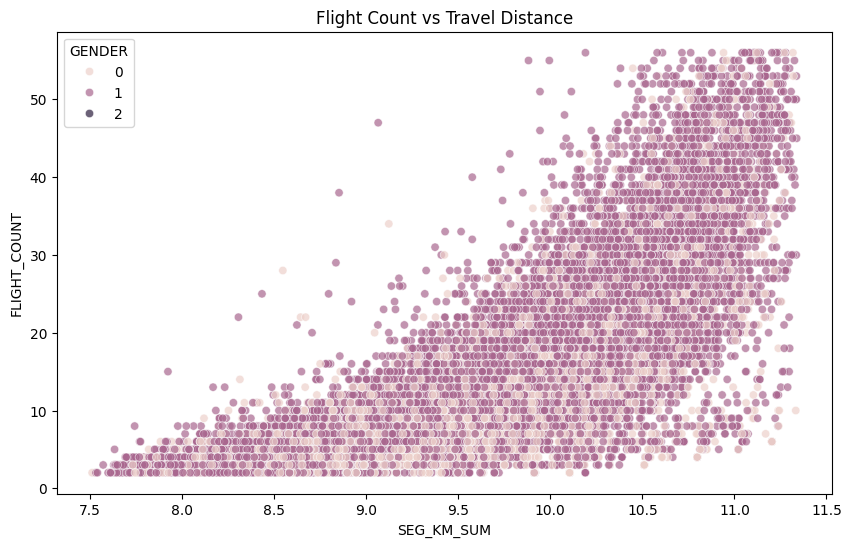

In [ ]:
#3)Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="SEG_KM_SUM", y="FLIGHT_COUNT", hue="GENDER", data=df, alpha=0.7)
plt.title("Flight Count vs Travel Distance")
plt.show()

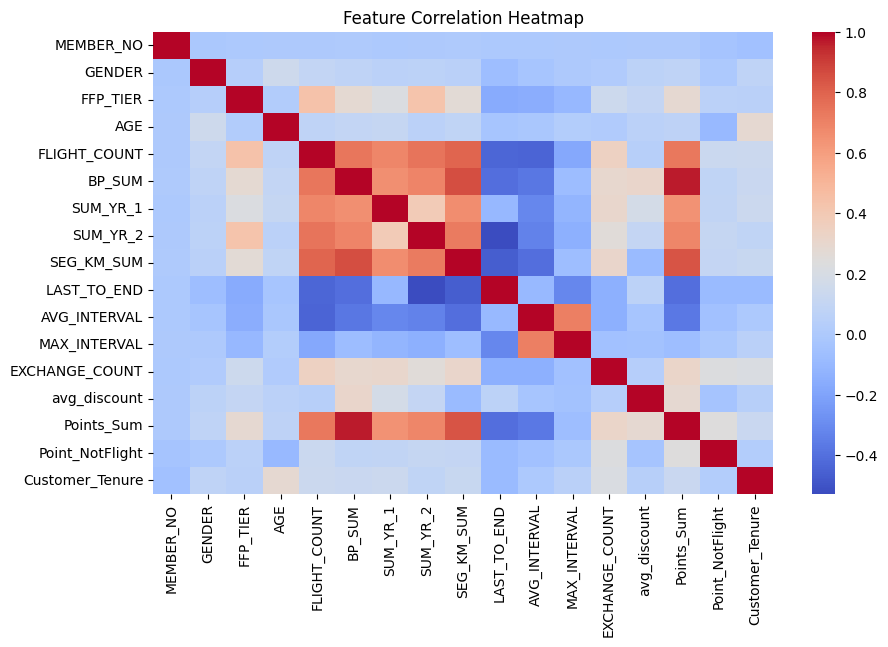

In [ ]:
#4)Heatmap
plt.figure(figsize=(10, 6))
# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

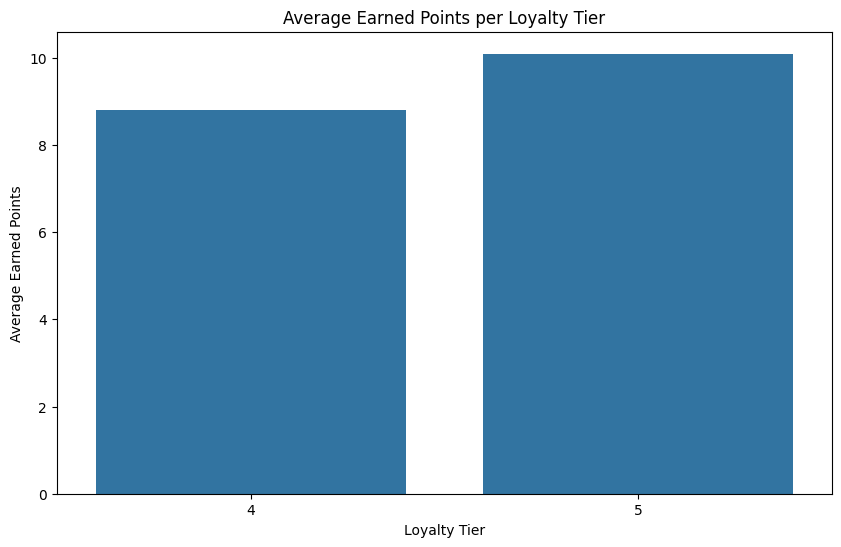

In [ ]:
#5)Barchart
plt.figure(figsize=(10, 6))
sns.barplot(x="FFP_TIER", y="Points_Sum", data=df, estimator=np.mean, ci=None)
plt.title("Average Earned Points per Loyalty Tier")
plt.xlabel("Loyalty Tier")
plt.ylabel("Average Earned Points")
plt.show()

In [ ]:
#Creating Clusters

#1)Behavioral Segmentation
#a)Flight booking patterns
df["Booking_Frequency"] = df["FLIGHT_COUNT"] / df["Customer_Tenure"]
df["Advance_Booking_Period"] = (df["FIRST_FLIGHT_DATE"] - df["FFP_DATE"]).dt.days
df["Preferred_Season"] = df["FIRST_FLIGHT_DATE"].dt.month.map(lambda x: "Summer" if x in [6, 7, 8] else "Winter" if x in [12, 1, 2] else "Spring/Fall")

#b)Flight Preferences
df["Flight_Class"] = np.where(df["FFP_TIER"] >= 4, "Business", "Economy")
df["Direct_vs_Connecting"] = np.where(df["AVG_INTERVAL"] < 10, "Direct", "Connecting")

In [ ]:
#2)Demographic & Psychographic Segmentation
#a)Demographic Insights
df["Estimated_Income"] = df["AGE"] * 1500
df["Occupation"] = df["WORK_PROVINCE"].apply(lambda x: "Corporate" if x != "Unknown" else "Other")
df["Family_Size"] = np.where(df["AGE"] > 30, np.random.randint(2, 5), 1)

#b)Psychographic Analysis
df["Travel_Motivation"] = np.where(df["FLIGHT_COUNT"] > 10, "Business", "Leisure")
df["Travel_Safety_Concern"] = np.where(df["avg_discount"] < 0.9, "High", "Low")

In [ ]:
#3)Geographic Segmentation
df["Route_Type"] = np.where(df["WORK_COUNTRY"] == "CN", "Domestic", "International")
df["Regional_Behavior"] = np.where(df["SEG_KM_SUM"] > df["SEG_KM_SUM"].median(), "Long-Haul", "Short-Haul")
categorical_features = ["Preferred_Season", "Flight_Class", "Direct_vs_Connecting", "Occupation", "Travel_Motivation", "Travel_Safety_Concern", "Route_Type", "Regional_Behavior"]
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

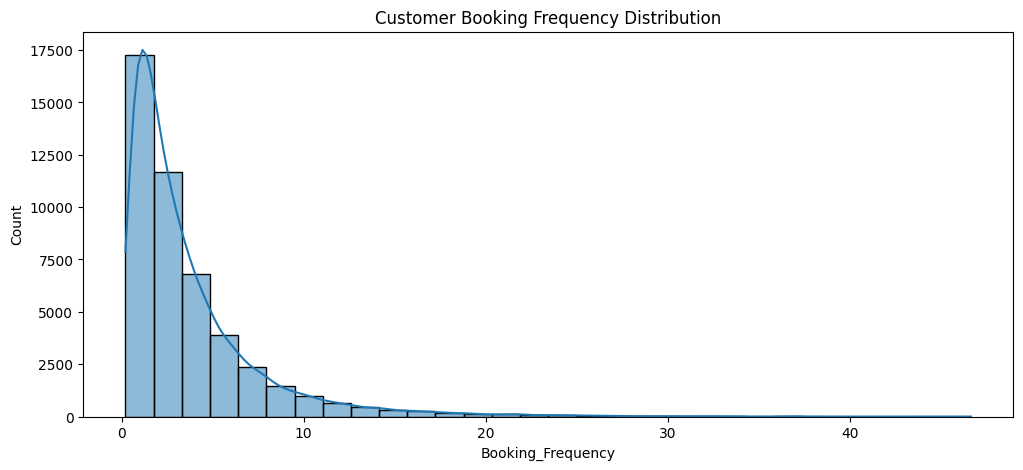

In [ ]:
#Visualizing some of the above different types of segmentation

# 1)Booking Frequency Distribution
plt.figure(figsize=(12, 5))
sns.histplot(df["Booking_Frequency"], bins=30, kde=True)
plt.title("Customer Booking Frequency Distribution")
plt.show()

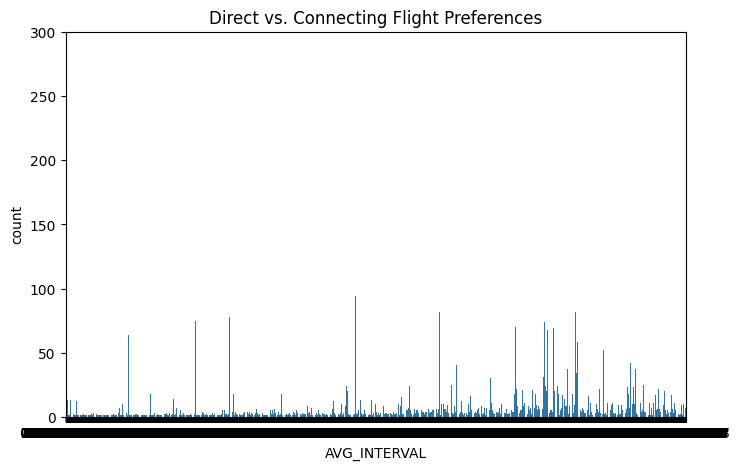

In [ ]:
# 2)Flight Preferences (Direct vs. Connecting)
plt.figure(figsize=(8, 5))
sns.countplot(x="AVG_INTERVAL", data=df)
plt.title("Direct vs. Connecting Flight Preferences")
plt.show()

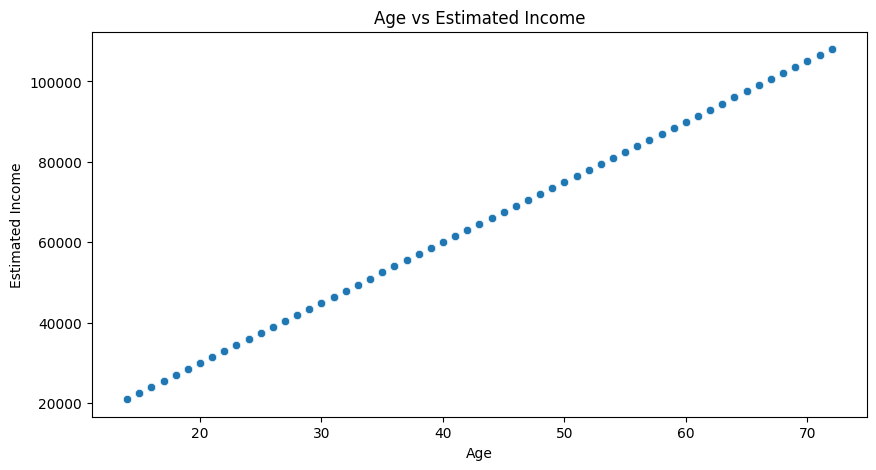

In [ ]:
# 3)Age vs. Estimated Income
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["AGE"], y=df["Estimated_Income"])
plt.title("Age vs Estimated Income")
plt.xlabel("Age")
plt.ylabel("Estimated Income")
plt.show()


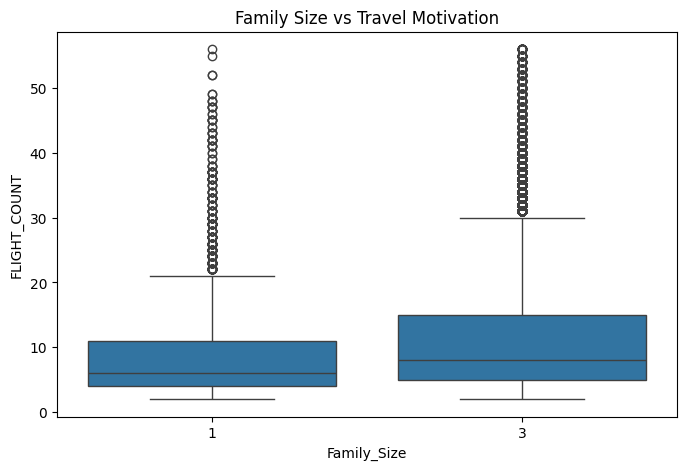

In [ ]:
#4) Family Size vs Travel Motivation
plt.figure(figsize=(8, 5))
sns.boxplot(x="Family_Size", y="FLIGHT_COUNT", data=df)
plt.title("Family Size vs Travel Motivation")
plt.show()

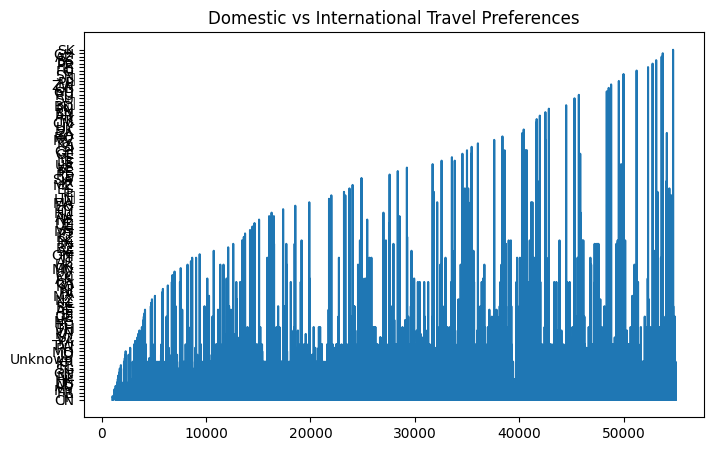

In [ ]:
#5)Domestic vs. International Travel
plt.figure(figsize=(8, 5))
plt.plot("WORK_COUNTRY", data=df)
plt.title("Domestic vs International Travel Preferences")
plt.show()


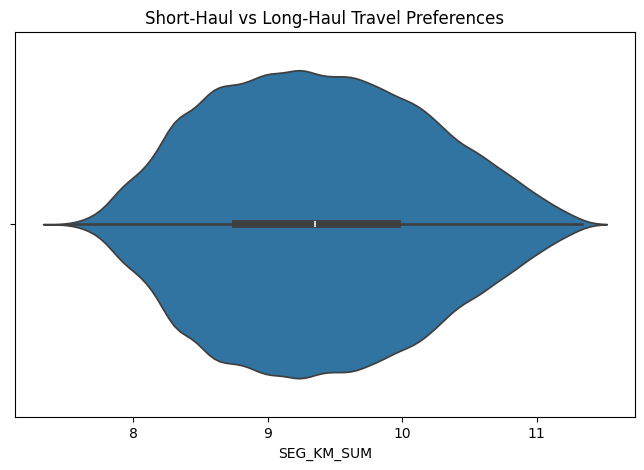

In [ ]:
# Long-Haul vs. Short-Haul Travel
plt.figure(figsize=(8, 5))
sns.violinplot(x="SEG_KM_SUM", data=df)
plt.title("Short-Haul vs Long-Haul Travel Preferences")
plt.show()

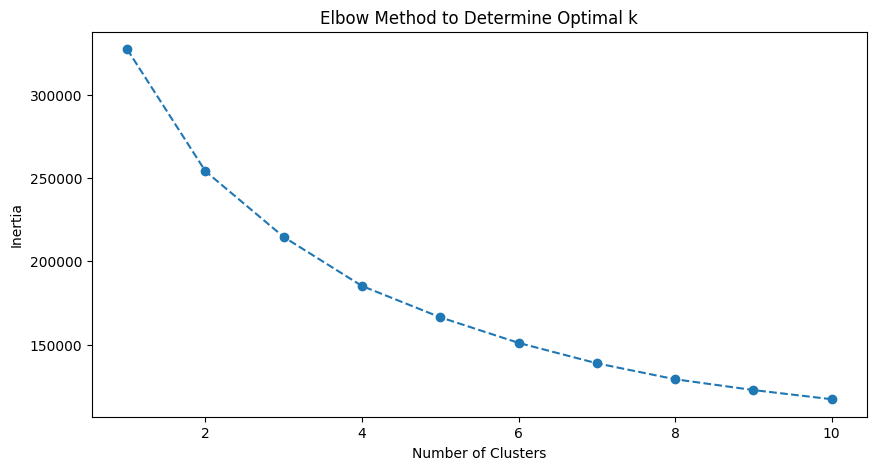

In [ ]:
#K means clustering(ELBOW METHOD)
features = df[['FLIGHT_COUNT', 'SEG_KM_SUM', 'Customer_Tenure', 'avg_discount', 'AGE', 'Booking_Frequency', 'Advance_Booking_Period']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method to Determine Optimal k")
plt.show()
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(scaled_features)

In [ ]:
#Cluster Analysis & Explainability
cluster_summary = df.groupby("Cluster").agg({
    "FLIGHT_COUNT": "mean",
    "SEG_KM_SUM": "mean",
    "Customer_Tenure": "mean",
    "avg_discount": "mean",
    "AGE": "mean",
    "Booking_Frequency": "mean",
    "Advance_Booking_Period": "mean"
}).reset_index()

print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
   Cluster  FLIGHT_COUNT  SEG_KM_SUM  Customer_Tenure  avg_discount  \
0        0     25.366707   10.367411         3.645093      0.723645   
1        1      8.952362    9.290780         6.493903      0.721904   
2        2      6.364703    8.995951         2.539899      0.705953   

         AGE  Booking_Frequency  Advance_Booking_Period  
0  42.670712           8.822372               65.659587  
1  47.283471           1.434931              378.148912  
2  38.727685           2.942262               75.317173  


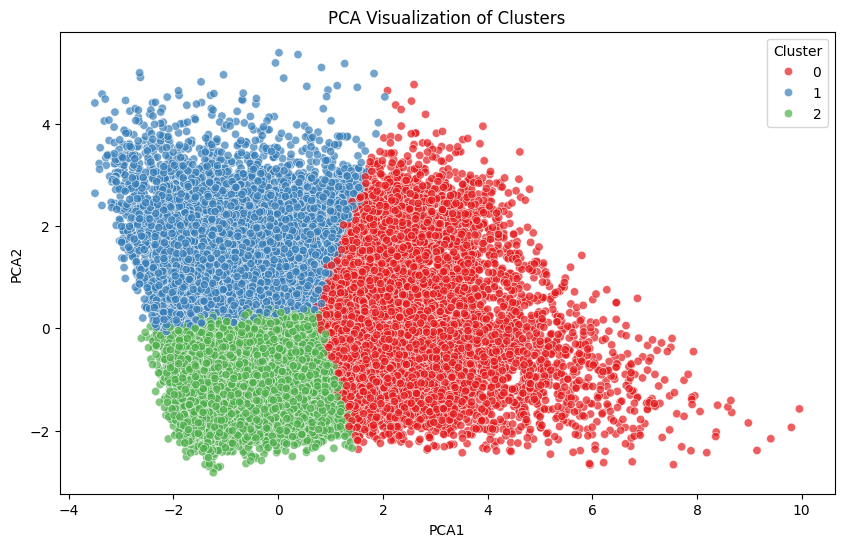

In [ ]:
#PCA for Visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
df["PCA1"] = reduced_features[:, 0]
df["PCA2"] = reduced_features[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster",data=df, palette="Set1", alpha=0.7)
plt.title("PCA Visualization of Clusters")
plt.show()

In [ ]:
#Exporting Results
df[['MEMBER_NO', 'Cluster']].to_csv("customer_segments.csv", index=False)
print("Clustering results saved successfully!")

Clustering results saved successfully!
